## Graphlets
#### CS 575 Tutorial
#### Winter 2026
####
#### Mike Goodrich

Sources

- Doroud, M., Bhattacharyya, P., Wu, S. F., & Felmlee, D. (2011, October). The evolution of ego-centric triads: A microscopic approach toward predicting macroscopic network properties. In 2011 IEEE Third International Conference on Privacy, Security, Risk and Trust and 2011 IEEE Third International Conference on Social Computing (pp. 172-179). IEEE.

- Tu, K., Li, J., Towsley, D., Braines, D., & Turner, L. D. (2019, August). gl2vec: Learning feature representation using graphlets for directed networks. In Proceedings of the 2019 IEEE/ACM international conference on advances in social networks analysis and mining (pp. 216-221).

- Copilot response to _"Could you please give me a summary of what graphlets are in a network science context?"_


- [Stanford Graph Machine Learning lecture 2.1](https://www.youtube.com/watch?v=3IS7UhNMQ3U). (Click to follow link.)

- The definitions of _isomorphism_ and _induced subgraph_ are taken from pages 1 and 2 in _Algebraic Graph Theory_ by C. Godsil and G. Royle (Springer 2001).

---

### 0 Learning Goals

The objective of this tutorial is for you (a) to understand the definition of a graphlet, (b) to understand how a set of graphlets are defined, and (c) to learn how to compute the __graphlet signature__ for a node. Along the way, you'll encounter the following concepts:
- subgraphs and induced subgraphs
- graphlet isomorphism classes
- rooted and unrooted graphlets
- an "orbit" around a node for a rooted graphlet

### 1 Graphlet Definition

The two primary sources used to construct this tutorial have slightly different defintions. The first source defines a set of graphlets as a "small connected non-isomorphic induced subgraphs of a larger network" [Tu et al 2019]. This definition doesn't include one element from the second source (the Stanford lecture): "A graphlet is a **rooted** connected non-isomorphic subgraph" [minute 19:30, emphasis added].  I've found that the union of these two definitions is the most useful. 

#### 1.1 Unrooted Graphlet
An unrooted graphlet is a connected, induced subgraph of a larger graph.

#### 1.2 Rooted Graphlet
A rooted graphlet is a connected, rooted, induced subgraph of a larger graph.

#### 1.3 Graphlets
A set of graphlets are a set of graphs that are 
  - non-isomorphic to each other,
  - connected subgraphs, 
  - rooted subgraphs, and
  - induced subgraphs

We'll begin with the notion of graph isomorphism.

---

### 2 Graph Isomorphism

The name _isomorphism_ means "same form", so two _isomorphic graphs_ have the same form as each other. In other words, two graphs are isomorphic if they are "essentially the same" as some others.  Mathematically, we show that two graphs are isomorphic by showing that one graph can be mapped to the other graph in such a way that essential graph properties stay the same.


#### 2.1 Examples to Build Intuition
Consider the following thought exercise. Observe that there are a finite number of graphs that I can construct from three nodes.  
- A graph with no edges
- A graph with only one edge
- A graph with two edges
- A graph with three edges

Consider the following two graphs:
- $G_1 = (V_1, E_1)$ where
  - $V_1 = \{a,b,c\}$
  - $E_1 = \{\}$
- $G_2 = (V_2, E_2)$ where
  - $V_2 = \{1,2,3\}$
  - $E_2 = \{\}$
Both graph $G_1$ and graph $G_2$ have three nodes and no edges. Even though the two graphs have different node names, the two graphs have the same number of edges. The key observation is that both graphs have essentially the same structure because they have the same number of nodes and the connections between the nodes is the same.

Consider a slight change to the example and construct two graphs with three vertices and one edge:
- $G_3 = (V_3, E_3)$ where
  - $V_3 = \{a,b,c\}$
  - $E_3 = \{(a,b)\}$
- $G_4 = (V_4, E_4)$ where
  - $V_4 = \{1,2,3\}$
  - $E_4 = \{(2,3)\}$
As before, the key observation is that both graphs have essentially the same structure because they have the same number of nodes and the connections between nodes is the same.

Observe that graph $G_1$ and graph $G_3$ have different structures: one has no edges and the other has oneone edge. These two graphs are not "essentially the same".

With these examples in mind, we can discuss Godsil and Royle's formal definition of a graph isomorphism. We'll split the discussion into two parts, a part that talks about the vertices and a part that talks about the edge structure.


#### 2.2 Bijective Mapping from Vertices to Vertices

Suppose we have two graphs, $G_1$ and $G_2$ with vertex sets $V(G_1)$ and $V(G_2)$, respectively. We could check to see if the two graphs can be isomorphic by counting the number of vertices and, if they match, conclude that it is possible for the two graphs to be isomorphic. The problem with that is that just counting vertices doesn't work well when we try to check edge structure.  

Instead, we'll replace "counting nodes" by talking about a mapping $\phi$ between the two vertex sets

$$ \phi : V(G_1) \rightarrow V(G_2) $$

If the mapping $\phi$ is a _bijection_ (i.e., it is both a _one-to-one and onto_ mapping) then we know that the number of vertices in the $V(G_1)$ and $V(G_2)$ must be the same.

**Example.** Suppose $V(G_1) = \{1,2,3\}$ and $V(G_2) = \{a,b,c\}$. The following table represents a bijection:

| $v \in V(G_1)$ | $\phi(v) \in V(G_2)$ |
| :---: | :---: |
| 1 | b |
| 2 | c | 
| 3 | a |

Notice how each vertex from graph $G_1$ is mapped to a unique vertex in graph $G_2$, and notice how each graph has the same number of vertices. Thus, $\phi$ is a bijection from $V(G_1)$ to $V(G_2)$.

By contrast, the mapping in the following table is not a bijection:

 $v \in V(G_1)$ | $\phi(v) \in V(G_2)$ |
| :---: | :---: |
| 1 | b |
| 2 | c | 
| 3 | b |

because both vertex 1 and vertex 2 are mapped to vertex b, and no vertices are mapped to vertex a.

#### 2.3 Edge-Preserving Bijective Mapping

The existence of a bijective mapping between vertices satisfies the first element of isomorphism: two graphs can only be isomorphic if they have the same number of vertices. Godsil and Royle's definition of isomorphic graphs adds a condition about edges. Two graphs $G_1$ and $G_2$ are isomorphic if the following two conditions hold:

- There exists a bijection $\phi: V(G_1) \rightarrow V(G_2)$
- If two vertices $v_1$ and $v_2$ are connected in graph $G_1$ then the corresponding vertices in $G_2$ are also connected.

This latter condition, which is sometimes called the "edge preserving mapping" condition, is formally given as

$$ \big(v_1,v_2\big) \in E(G_1) \leftrightarrow \big( \phi(v_1),\phi(v_2)\big ) \in E(G_2) $$

In essence, if two nodes are connected before the mapping then they are connected after the mapping. 

_Two graphs are isomorphic if there exists an edge-preserving bijective mapping._


#### 2.4 Example 

Are the two graphs below isomorphic? The answer is yes, and we will show that by constructing an edge-preserving bijective mapping.

- $G_1 = (V_1,E_1)$
  - $V_1 = \{1,2,3\}$ 
  - $E_1 = \{(1,2),(2,3)\}$

- $G_2 = (V_2,E_2)$
  - $V_2 = \{a,b,c\}$ 
  - $E_2 = \{(b,c),(c,a)\}$

It's tempting to say that the two graphs are isomorphic since they have each have three vertices and two edges, but we'll see that the direction of the edges matters.

Let's draw the two graphs side-by-side to build some intuition.

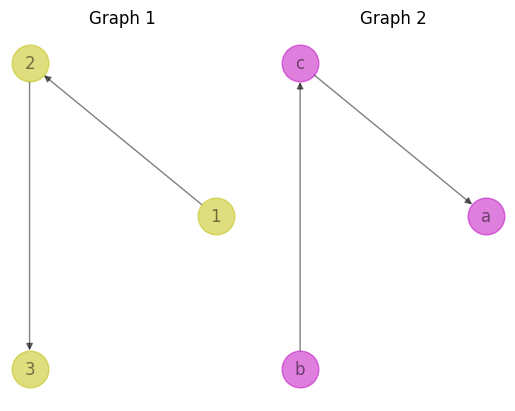

In [10]:
# Using python 3.11.2
# Isomorphism
from matplotlib import pyplot as plt
import networkx as nx

## Define graph G1
nodes_G1 = {1,2,3}
edges_G1 = {(1,2),(2,3)}
G1 = nx.DiGraph()
G1.add_nodes_from(nodes_G1)
G1.add_edges_from(edges_G1)

## Define graph G2
nodes_G2 = {'a','b','c'}
edges_G2 = {('b','c'),('c','a')}
G2 = nx.DiGraph()
G2.add_nodes_from(nodes_G2)
G2.add_edges_from(edges_G2)

## Plot graph G1
pos1 = nx.circular_layout(G1)
plt.figure(1)
plt.subplot(121)
ax = plt.gca()
ax.set_title("Graph 1")
nx.draw(G1,pos1,node_color = 'y', alpha = 0.5, node_size = 700, with_labels = True)

## Plot graph G2
pos2 = nx.circular_layout(G2)
plt.subplot(122)
ax = plt.gca()
ax.set_title("Graph 2")
nx.draw(G2,pos2,node_color = 'm', alpha = 0.5, node_size = 700, with_labels = True)

These two graphs are isomorphic because the following mapping is an edge-reserving bijective mapping

| $v \in V(G_1)$ | $\phi(v) \in V(G_2)$ |
| :---: | :---: |
| 1 | b |
| 2 | c | 
| 3 | a |

but it's hard to see that in the figure. Let's redraw the second figure.

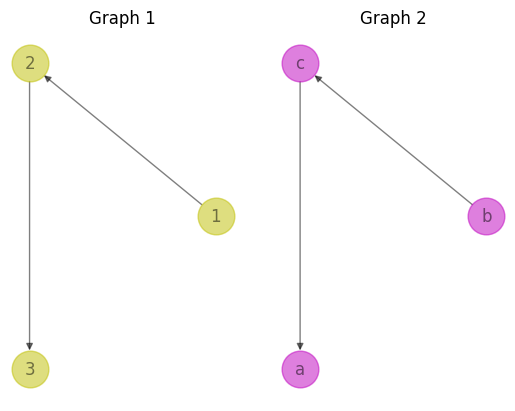

In [11]:
## Plot graph G1
pos1 = nx.circular_layout(G1)
plt.figure(1)
plt.subplot(121)
ax = plt.gca()
ax.set_title("Graph 1")
nx.draw(G1,pos1,node_color = 'y', alpha = 0.5, node_size = 700, with_labels = True)

## Plot graph G2
pos2 = nx.circular_layout(G2)
pos2['a'] = pos1[3]
pos2['c'] = pos1[2]
pos2['b'] = pos1[1]
plt.subplot(122)
ax = plt.gca()
ax.set_title("Graph 2")
nx.draw(G2,pos2,node_color = 'm', alpha = 0.5, node_size = 700, with_labels = True)

The picture makes it obvious that each graph has essentially the same structure: a chain of three vertices connected in order by directed edges.

Observe the following about what happens to the nodes when they are mapped:
  - node 1 on the left gets mapped to node b on the right
  - node 2 on the left gets mapped to node c on the right
  - node 3 on the left gets mapped to node a on the right

Above, we said that isomorphism requires that if there is an edge between two nodes before the mapping then there still needs to be an edge between the mapped nodes after the mapping. Recall that the definition of edge-preserving is
$$ \big(v_1,v_2\big) \in E(G_1) \leftrightarrow \big( \phi(v_1),\phi(v_2)\big ) \in E(G_2) $$
Observe the following about the edges of the two graphs:
  - there is a directed edge (1,2) on the left and a directed edge (b,c) on the right, so the mapping 1-->a and 2-->c preserves connectedness
  - there is a directed edge (2,3) on the left and a directed edge (c,a) on the right, so the mapping 2-->c and 3-->a preserves connectedness

The mapping changed the names of the vertices, but vertices connected before the mapping are still connected after the mapping. Since there is a _edge-preserving bijection_ between the two graphs, the two graphs are isomorphic.



#### 2.5 Counterexample

The following two graphs are not isomorphic.

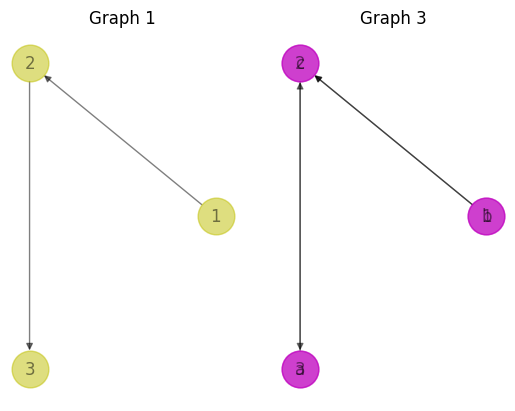

In [12]:
# Using python 3.11.2
# Not isomorphic
from matplotlib import pyplot as plt
import networkx as nx

## Define graph G1
nodes_G1 = {1,2,3}
edges_G1 = {(1,2),(2,3)}
G1 = nx.DiGraph()
G1.add_nodes_from(nodes_G1)
G1.add_edges_from(edges_G1)

## Define graph G3
nodes_G3 = {'a','b','c'}
edges_G3 = {('b','c'),('a','c')}
G3 = nx.DiGraph()
G3.add_nodes_from(nodes_G3)
G3.add_edges_from(edges_G3)

## Plot graph G1
pos1 = nx.circular_layout(G1)
plt.figure(1)
plt.subplot(121)
ax = plt.gca()
ax.set_title("Graph 1")
nx.draw(G1,pos1,node_color = 'y', alpha = 0.5, node_size = 700, with_labels = True)

## Plot graph G3
pos3 = nx.circular_layout(G3)
pos3['a'] = pos1[3]
pos3['c'] = pos1[2]
pos3['b'] = pos1[1]
plt.subplot(122)
ax = plt.gca()
ax.set_title("Graph 1")
nx.draw(G1,pos1,node_color = 'm', alpha = 0.5, node_size = 700, with_labels = True)
plt.subplot(122)
ax = plt.gca()
ax.set_title("Graph 3")
nx.draw(G3,pos3,node_color = 'm', alpha = 0.5, node_size = 700, with_labels = True)

The two graphs are not isomorphic because the edge structure is not the same. The first graph is a chain of vertices with the edges pointing from the first element of the chain to the second to the third. The second graph isn't a chain but rather a graph where two vertices point to a third vertex. 

#### 2.6 `networkx` Isomorphism Tool

Determining whether two graphs are isomorphic is in class NP. (You can ignore this part of the discussion if you aren't familiar with complexity classes a la CS 252.) It is not known whether there is a polynomial-time solution in general, but there are polynomial-time algorithms that work for certain graph types.

`networkx` provides a tool for checking whether two graphs are isomorphic. I've never looked into the algoirthm to determine how it works, but we can form a simplified mental model for how it might work by assuming that it searches through all possible bijective mappings and checks whether any of them are edge-preserving. 

The following code cells demonstrate how to use the tool.


In [13]:
import networkx.algorithms.isomorphism as iso
def is_isomorphic(G1, G2):
    GM = iso.DiGraphMatcher(G1, G2)
    if GM.is_isomorphic():
        print(f"mapping found: {GM.mapping}")
        return True
    return False
print("Are G1 and G2 isomorphic?", is_isomorphic(G1, G2))
print("Are G1 and G3 isomorphic?", is_isomorphic(G1, G3))

mapping found: {3: 'a', 2: 'c', 1: 'b'}
Are G1 and G2 isomorphic? True
Are G1 and G3 isomorphic? False


---
---

#### 3 Isomorphism is an Equivalence Relation

Defining a a graphlet depends on an important property of graph isomorphisms: _isomorphism is an equivalence relation_. If needed, use an AI assistant to help you review the following terms related to the mathematical notion of an equivalence relation:
- binary relation
- equivalence relation
- equivalence class

Since graph isomorphism is an equivalence relation, we can sometimes treat two isomorphic graphs as if they are identical. In this context, an _equivalence class_ is the set of all graphs that are isomorphic to each other.


#### 3.1 Representing Isomorphic Graphs

It is useful to illustrate how we can visualize all graphs in an isomorphism equivalence class. We'll do this by constructing two isomorphic graphs and then removing the vertex label. 

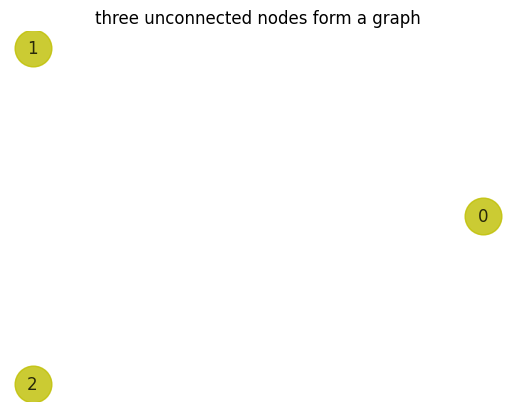

In [38]:
# Isomorphism
from matplotlib import pyplot as plt
import networkx as nx

nodes: set[int] = {0,1,2}
G = nx.DiGraph()
G.add_nodes_from(nodes)
pos = nx.circular_layout(G)
ax = plt.gca()
ax.set_title("three unconnected nodes form a graph")
nx.draw(G,pos,node_color = 'y', alpha = 0.8, node_size = 700, with_labels = True)

We can form a graph that is isomorphic to the first.

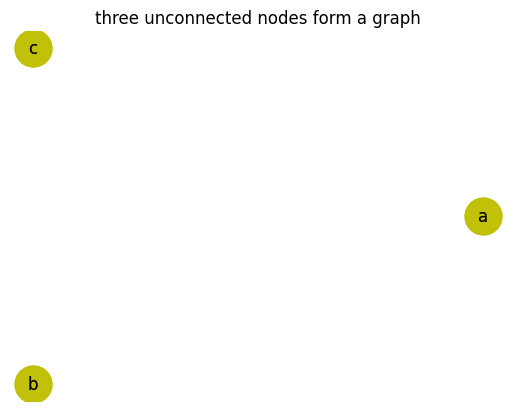

In [16]:
nodes: set[int] = {'a','b','c'}
G = nx.DiGraph()
G.add_nodes_from(nodes)
pos = nx.circular_layout(G)
ax = plt.gca()
ax.set_title("three unconnected nodes form a graph")
nx.draw(G,pos,node_color = 'y', alpha = 0.8, node_size = 700, with_labels = True)
colormap = dict([(node,'y') for node in list(G.nodes)])
ax = plt.gca()
ax.set_title("three unconnected nodes form a graph")
nx.draw(G,pos,node_color = 'y', alpha = 0.8, node_size = 700, with_labels = True)

These two graphs are isomorphic since all that changed was the names of the nodes. We can represent the equivalence class of all nodes that are isomorphic to these two graphs by simply dropping the node labels.

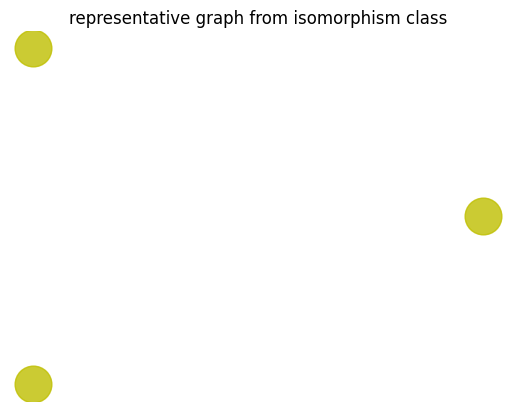

In [40]:
colormap = dict([(node,'y') for node in list(G.nodes)])
plt.figure(1)
ax = plt.gca()
ax.set_title("representative graph from isomorphism class")
nx.draw(G,pos,node_color = 'y', alpha = 0.8, node_size = 700, with_labels = False)

#### 3.2 Representing Nontrivial Isomorphic Graphs 
Let's add a single directed edge and draw a graph from this isomorphism class 

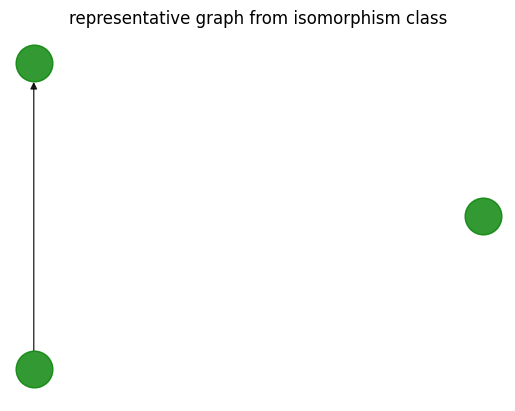

In [41]:
G.add_edge(1,0)
plt.figure(1)
ax = plt.gca()
ax.set_title("representative graph from isomorphism class")
nx.draw(G,pos,node_color = 'g', alpha = 0.8, node_size = 700, with_labels = False)

The graph above represents one of the (isomorphism) equivalence classes for a directed graph with three vertices. Let's add another edge.

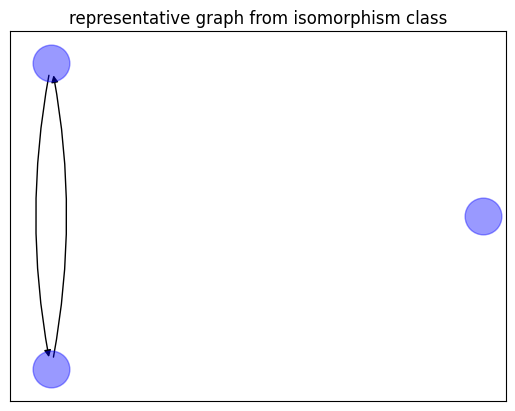

In [42]:
# Add an edge in the opposite direction
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from([(0,1),(1,0)])
plt.figure(1)
ax = plt.gca()
ax.set_title("representative graph from isomorphism class")
nx.draw_networkx_nodes(G,pos,node_color = 'b', alpha = 0.4, node_size = 700)
_ = nx.draw_networkx_edges(G,
                       pos,
                       connectionstyle="arc3,rad=0.1"
)

We now have a representative graph from a new equivalence class.


#### 3.3 Set of Equivalence Classes

The following figure is from Doroud et al. 2011.

<img src = "figures/isomorphism_classes_3_node_directed_graph.png" alt="set of all isomorphism classes from Figure 3.1 of Doroud et al. 2011"/>

It illustrates a set of graphlets, which for our purposes is just the set of isomorphism equivalence classes for a directed graph with three vertices. Take a moment to convince yourself that none of these graphs is isomorphic to any of the other graphs. Ignore the numbering beneath each graph in the figure; the numbering is a special way of identifying the equivalence classes, but we won't use those identifiers.

If we want to, we can construct each of these graphs. Let's just create a few of them.

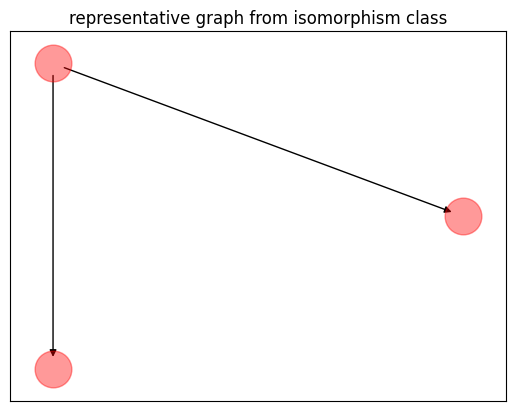

In [43]:
# Create the next equivalence class
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from([(0,1),(0,2)])
plt.figure(1)
ax = plt.gca()
ax.set_title("representative graph from isomorphism class")
nx.draw_networkx_nodes(G,pos,node_color = 'r', alpha = 0.4, node_size = 700)
_ = nx.draw_networkx_edges(G,
                       pos,
                       connectionstyle="arc3,rad=0.0")

Add one more

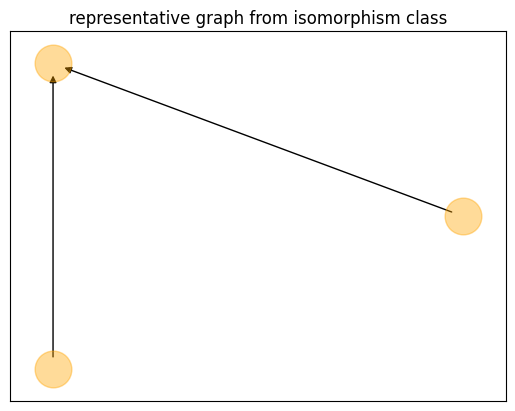

In [44]:
# And one more
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from([(1,0),(2,0)])
plt.figure(1)
ax = plt.gca()
ax.set_title("representative graph from isomorphism class")
nx.draw_networkx_nodes(G,pos,node_color = 'orange', alpha = 0.4, node_size = 700)
nx.draw_networkx_edges(G, 
                       pos,
                       connectionstyle="arc3,rad=0.0")

Notice how the arrows in this figure point in the opposite direction than the arrows in the previous graph. The two graphs are not isomorphic because swapping two the names of two vertices doesn't preserve the direction of the edges.

---

#### 4 Graphlets are Connected

Doroud et al.'s 2011 paper introduced the idea of graphlets, which was essentially the set of isomorphism equivalence classes. Since that paper, others have refined Douroud et al.'s definition to make it more useful. This tutorial had listed the four elements required to make up a graphlet:

**Elements of a group of graphlets:**
  - non-isomorphic graphs
  - connected graphs
  - rooted graphs
  - induced subgraphs

  Some of the graphs above are not connected. Let's add that to our definition and see what we produce. For the next part of the tutorial, we'll use undirected graphs.


#### 4.1 Restricting the Isomorphism Classes to Connected Graphs
  The following code generates every possible _connected_ graph that can be created from three vertices. Using the copilot prompt "how do i find the set of all isomorphic graphs with a four nodes in networkx", we get the following code. 

I've modified the code from copilot in four ways: 
- Added type hints
- Changed the index names so they can be either strings or ints
- Restricted attention to connected graphs
- Made it so that it produced the graphlets composed of nodes passed to the function in the `nodes` list

Notice lines 16 and 17. They say that only connected graphs can be graphlets.

In [17]:
import networkx as nx
from itertools import combinations
from typing import  Union

def find_all_unrooted_graphlets(nodes: list[Union[str,int]]) -> list[nx.Graph]:
    all_graphs = []
    # Generate all possible edges
    possible_edges = list(combinations(nodes, 2))

    # Generate all possible graphs
    for i in range(2**len(possible_edges)):
        edges = [possible_edges[j] for j in range(len(possible_edges)) if (i >> j) & 1]
        G = nx.Graph()
        G.add_nodes_from(nodes)
        G.add_edges_from(edges)
        if nx.is_connected(G):
            all_graphs.append(G)

    ## Only keep one subgraph from each isomorphism class ##
    unique_graphs = []

    for G in all_graphs:
        if not any(nx.is_isomorphic(G, H) for H in unique_graphs):
            unique_graphs.append(G)
    return unique_graphs

I've constructed a helper function that allows us to visualize all the graphs in a particular set. The function, `show_graphs_in_a_set`, takes a list of graphs and displays them in a grid layout. It arranges the graphs in rows and columns (with a default of 4 columns), and each graph is drawn in a circular layout with a different color. You can optionally provide node labels, which will be displayed on the nodes. To use this function, simply call `show_graphs_in_a_set(graphs, labels, num_cols)` where `graphs` is a list of networkx Graph objects, `labels` is an optional dictionary mapping nodes to their display labels, and `num_cols` is the desired number of columns.

In [ ]:
import sys
sys.path.insert(0, '../src')
from graphlet_utilities import show_graphs_in_a_set

Collect all the graphlets for a graph with three vertices

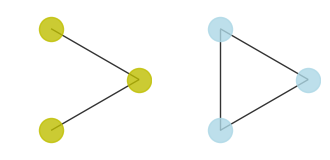

In [47]:
graphlets = find_all_unrooted_graphlets(['A', 'B', 'C'])
show_graphs_in_a_set(graphlets, num_cols=4)

To help build intuition, we can do the same exercise for graphs with two vertices ...

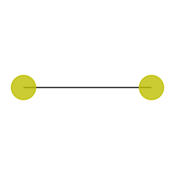

In [48]:
graphlets = find_all_unrooted_graphlets(['A', 'B'])
show_graphs_in_a_set(graphlets, num_cols=4)

... and four vertices.

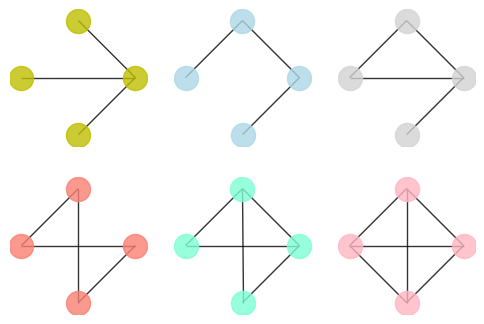

In [49]:
graphlets = find_all_unrooted_graphlets(['A', 'B', 'C', 'D'])
show_graphs_in_a_set(graphlets, num_cols=3)

Notice how none of the graphs above look like the others. Our "pattern-matching brains" naturally differentiate between the different isomorphism classes when graphs are simple to draw.

---

#### Graphlets are Rooted Graphs

Recall the four elements of a group of graphlets:

**Elements of a group of graphlets:**
  - non-isomorphic graphs
  - connected graphs
  - rooted graphs
  - induced subgraphs

  Looking at all the possible three node subgraphs of a particular graph will help us understand what it means for two _rooted graphs_ to be isomorphic. Let's create a simple graph that we can use to guide the discussion. 

(-1.2, 1.2)

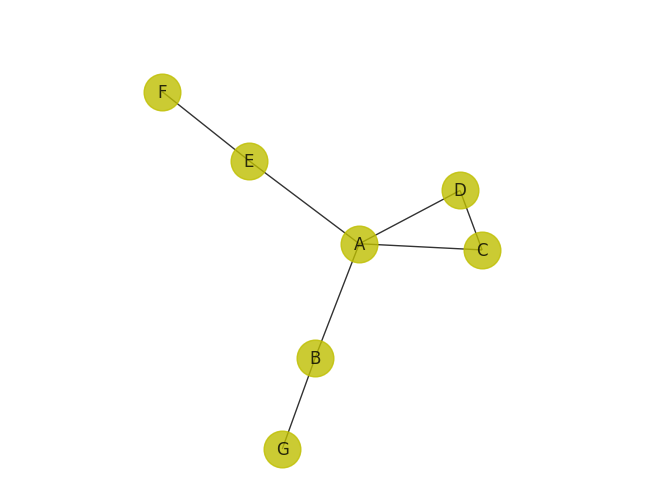

In [50]:
import networkx as nx 
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from({'A','B','C','D','E','F','G'})
G.add_edges_from({('A','B'),('A','C'),('A','D'),('A','E'),('D','C'), ('B','G'), ('F','E')})
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G,pos,node_color='y', alpha = 0.8, node_size = 700, with_labels = True)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)

We can write a utility that finds all the connected subgraphs of a particular graph that contain a specific vertex.

In [51]:
import networkx as nx
from itertools import combinations

def find_subgraphs_containing_vertex(G: nx.Graph, 
                              size: int, 
                              vertex: str) -> None:
    graphlets: list[nx.Graph] = []
    for nodes in combinations(G.nodes(), size):
        if vertex not in set(nodes):  # Skip subgraphs that don't contain the target vertes
            continue
        subgraph: nx.Graph = G.subgraph(nodes)
        if nx.is_connected(subgraph):
            graphlets.append(subgraph)
    return graphlets

Find all three-node subgraphs that contain vertex `A`.

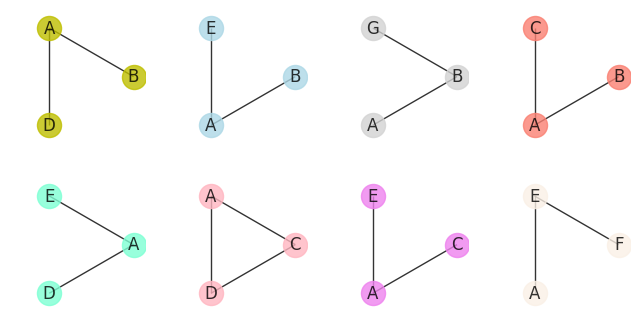

In [52]:
graphs = find_subgraphs_containing_vertex(G, 3, 'A')
labels: dict[str, str] = {vertex: vertex for vertex in G.nodes()}
show_graphs_in_a_set(graphs, labels)

As the use of graphlets has evolved, people have found it useful to differentiate
- not only between the subgraph with three edges and every other subgraph
- but also between different types of the two-edge subgraph.

Note that there are five two-edge subgraphs where node `A` is between the other two nodes, and two two-edge subgraphs where node `A` is on one of the ends. 

The key observation is that the location of vertex `A` in the subgraph matters. If call node `A` the _root_ node, then we need to find a way to say that the two subgraph patterns are not isomorphic if we care about the location of vertex `A`.

Let's look at a solution, and then we'll explain what is going on. 

In [ ]:
import networkx as nx
from itertools import combinations
import networkx.algorithms.isomorphism as iso

""" Portions of this code were obtained using prompts from 
    copilot. I made a mistake and didn't record the series
    of prompts so I can't document them properly. All I can 
    say is that the prompts were about finding isomorphic
    rooted graphs"""

def rooted_is_isomorphic(G1, G2, root):
    GM = iso.GraphMatcher(G1, G2)
    if GM.is_isomorphic():
        for mapping in GM.isomorphisms_iter():
            if mapping[root] == root:
                return True
    return False

def find_all_graphlets(nodes: list[str],
                       root) -> list[nx.Graph]:
    all_graphs = []
    # Generate all possible edges
    possible_edges = list(combinations(nodes, 2))

    # Generate all possible graphs
    for i in range(2**len(possible_edges)):
        edges = [possible_edges[j] for j in range(len(possible_edges)) if (i >> j) & 1]
        G = nx.Graph()
        G.add_nodes_from(nodes)
        G.add_edges_from(edges)
        if nx.is_connected(G):
            all_graphs.append(G)

    ## Only keep one subgraph from each isomorphism class ##
    unique_graphs = []
    for G in all_graphs:
        if not any(rooted_is_isomorphic(G, H, root) for H in unique_graphs):
            unique_graphs.append(G)
    return unique_graphs


The key difference between this version of finding all graphlets and the previous versio is in linke 37. In this version of the code, the key function is 

`if not any(rooted_is_isomorphic(G, H, root))`. 

In the other version, the corresponding line of code was

`if not any(nx.is_isomorphic(G, H))`.

The old version didn't care about the location of the _root_ vertex, but the new version does care.

Let's look at the pictures of the graphlets returned from this function.

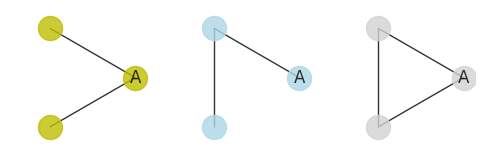

In [54]:
graphlets = find_all_graphlets(['A', 'B', 'C'], 'A')
labels = {'A': 'A'}
show_graphs_in_a_set(graphlets, labels)

Observe how the set of graphlets now contains three graphs: one that is fully connected, one with vertex `A` on between the other two vertices, and one with vertex `A` as an end point.

The key function call was

`if not any(rooted_is_isomorphic(G, H, root))`

which is a function defined above, but repeated here so we can talk about it.

In [55]:
import networkx.algorithms.isomorphism as iso
def rooted_is_isomorphic(G1, G2, root):
    GM = iso.GraphMatcher(G1, G2)
    if GM.is_isomorphic():
        for mapping in GM.isomorphisms_iter():
            if mapping[root] == root:
                return True
    return False

The workhorse of this code is the function `GM = iso.GraphMatcher(G1, G2, root)`. This function, which will run really slowly for graphs with a lot of vertices, creates an object of type `GraphMatcher`. Calling the class member function `GM.is_isomorphic()` returns true of the two graphs are isomorphic. So that's good.

`GraphMatcher` does a lot more than just determine whether two graphs are isomorphic. It is also capable of finding every isomorphism mapping between the two graphs. We'll need to return to the definition of a isomorphism to understand what it means to "find every isomorphism mapping". 

Godsil and Royle's definition of isomorphic graphs says that graphs $G_1$ and $G_2$ are isomorphic if the following two conditions hold:

- There exists a bijection $\phi: V(G_1) \rightarrow V(G_2)$
- If two vertices $v_1$ and $v_2$ are connected in graph $G_1$ then the vertices in $G_2$ are also connected.

This latter condition can be written as 

$$ \big(v_1,v_2\big) \in E(G_1) \leftrightarrow \big( \phi(v_1),\phi(v_2)\big ) \in E(G_2) $$

The phrase "fine every isomorphism mapping" means that the `GraphMatcher.isomorphisms_iter()` finds a mapping $phi$ that satisfies the two conditions, then finds a different mapping, and so on. 

What we are going to look for is an isomorphism mapping $\phi$ that has the special property that the root vertex is in the same location, relative to the edges in the graph, in both graphs. This means that $\phi({\rm root}) = {\rm root}$. The line `if mapping[root] == root` implements this check for us. 

And here's the key observation: if there is an isomorphism mapping $\phi$ that satisfies $\phi({\rm root}) = {\rm root}$ then that tells us that the two graphs are _isomorphic_ and that the _root vertex is in the same location in both graphs_. If not such mapping can be found, the two graphs, though possible isomorphic, do not satisfy the property that one can be mapped to the other without moving the root vertex. 

---

Let's build intuition by looking at the set of unrooted graphlets again and comparing them to the set of rooted graphlets.

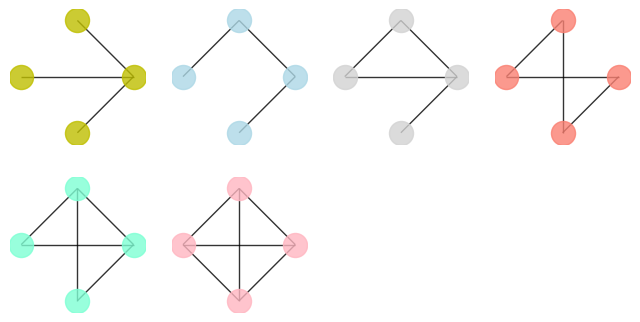

In [56]:
### Unrooted 
four_node_graphlets = find_all_unrooted_graphlets(['A', 'B', 'C', 'D'])
show_graphs_in_a_set(four_node_graphlets, num_cols=4)

And now rooted

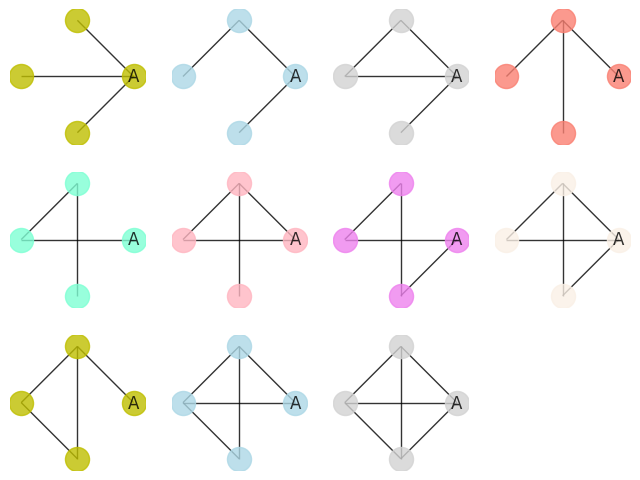

In [57]:
four_node_graphlets = find_all_graphlets(['A', 'B', 'C', 'D'], 'A')
labels = {'A': 'A'}
show_graphs_in_a_set(four_node_graphlets, labels)

Look at how many more graphlets there are. And that is why people use rooted graphs to create their graphlets, because rooted graphlets offer more ways to talk about what the graph around a specific vertex looks like! 


---

#### Graphlets are Induced Subgraphs

We've figured out three of the four requirements of a graphlet.

**Elements of a group of graphlets:**
  - non-isomorphic graphs
  - connected graphs
  - rooted graphs
  - induced subgraphs

  We can now talk about _induced subgraphs_. Let's return to the set of all three vertex subgraphs found in our example graph. Here's the example graph again:

(-1.2, 1.2)

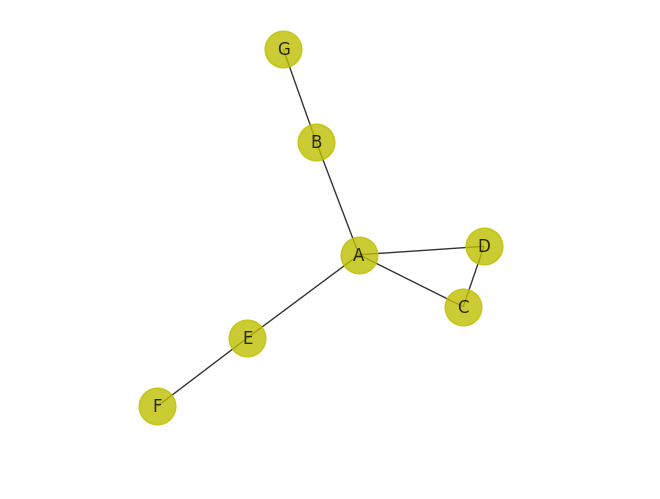

In [58]:
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G,pos,node_color='y', alpha = 0.8, node_size = 700, with_labels = True)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)

And here are the sets of all three-node subgraphs containing vertex `A`.

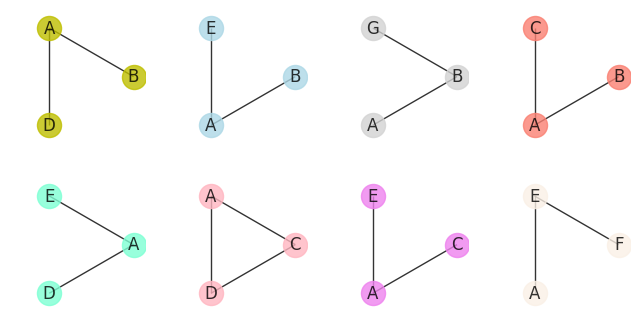

In [59]:
graphs = find_subgraphs_containing_vertex(G, 3, 'A')
labels: dict[str, str] = {vertex: vertex for vertex in G.nodes()}
show_graphs_in_a_set(graphs, labels)

Look at the subgraph containing vertices `A`, `C`, and `D`. Notice how the original graph has these three vertices connected to each other too. But wouldn't it be accurate to say that those three vertices are also part of a subgraphs `A-C-D`, `A-D-C`, and `C-A-D`. Read the dashes in this notation as a representation of an edge between the vertices. Why don't those _triplet_ graphs show up in the set of subgraphs?

Before we give the mathematical reason, which will define what it means to be an _induced subgraph_, let's talk about why we are doing all this work. Recall from class that the _local clustering coefficent_ told us the number of _triads_ that a vertex was in divided by the number of _triplets_ that the vertex was in. Here's a screen shot from a class slide.

<img src = "./figures/triples_and_triads.png" alt="triples and triads from class slides"/>

Knowing that a graph is part of a triad tells us a lot about what is happening around the graph, so when we should say that a vertex is part of a triad and not just just part of a triplet involving the same vertices.

That's why the triad containing vertices `A`, `C`, and `D` is part of the important three-vertex subgraphs containing vertex `A`, and none of the triplet subgraps `A-C-D`, `A-D-C`, and `C-A-D` are.

---

**Mathematical Definition of an Induced Subgraph**

An induced subgraph is a special type of subgraph. Consider graph $G_2$ and another graph $G_1$. Recall that graph $G_1$ is a subgraph of $G_2$ if

  - $V(G_1) \subseteq V(G_2)$, and
  - $E(G_1) \subseteq E(G_2)$

Essentially, a subgraph is made up of the parts (vertices and edges) of another graph.

An _induced subgraph adds a third condition

  - $\forall u,v \in V(G_1)\ \  (u,v) \in E(G_2) \Rightarrow (u,v) \in E(G_1)$

In words, if the subgraph $G_1$ has two nodes that were connected in $G_2$ then $G_1$ is an _induced subgraph of $G_2$_ only if the two nodes are also connected in $G_1$. 

In the original graph, a subgraph made up of nodes $A$, $C$, and $D$ is an induced subgraph only if it contains the edges $\{A,C\}$, $\{C,D\}$, and $\{A,D\}$. Thus, the induced subgraph containing these three nodes is a triad. Relying on induced subgraphs automatically tells us when a node is part of a triad and not just a triplet.


And here's where we were lucky. The code for finding all the three-node subgraphs used the following line: `subgraph: nx.Graph = G.subgraph(nodes)`. It's easy to miss, but the networkx function `G.subgraph` returns the _induced subgraph_ of graph `G` that contains the nodes in the list. We got the induced subgraphs without even trying!

---
---


### Using Graphlets

The purpose of this (very long) discussion is because graphlets tell us about the local graph structures that surround a node in a given graph. What we'll do is choose a node and count how many of the possible graphlets the subgraphs containing that node belongs too.

We can illustrate with an example. It's helpful to have a drawing routine that show the graph in a bright color that is different from the colors of our graphlets.

In [60]:
from typing import Callable
def show_graph(G: nx.Graph, 
               title:str, 
               labels: dict[str, str],
               layout: Callable = nx.circular_layout,
               size = 2,
               node_color = 'cyan') -> None:
    _ = plt.figure(figsize = (size,size))
    pos = layout(G)
    nx.draw(G, 
                pos, 
                node_color=node_color, 
                alpha = 0.8, 
                node_size = 300, 
                labels = labels)
    ax = plt.gca()
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.set_title(title)

We'll use the same example graph

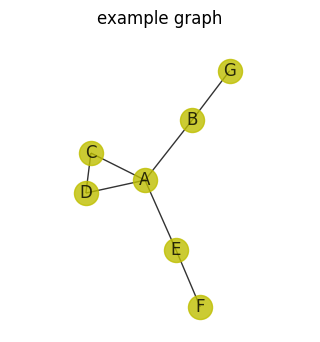

In [61]:
labels: dict[str, str] = {vertex: vertex for vertex in G.nodes()}
show_graph(G,
           title = 'example graph', 
           labels = {vertex: vertex for vertex in G.nodes()},
           layout = nx.spring_layout,
           size = 3,
           node_color='y')

Let's find all graphlets that contain two nodes or three nodes.

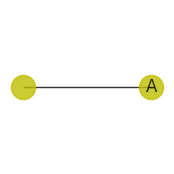

In [62]:
two_node_graphlets = find_all_graphlets(['A', 'B'], 'A')
labels = {'A': 'A'}
show_graphs_in_a_set(two_node_graphlets, labels)

And repeat for three node graphlets

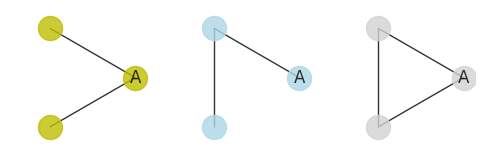

In [63]:
three_node_graphlets = find_all_graphlets(['A', 'B', 'C'], 'A')
labels = {'A': 'A'}
show_graphs_in_a_set(three_node_graphlets, labels)

And repeate for four node graphlets

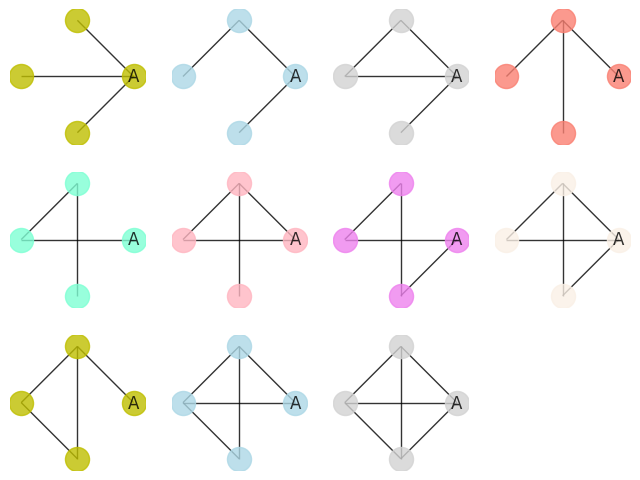

In [64]:
four_node_graphlets = find_all_graphlets(['A', 'B', 'C', 'D'], 'A')
labels = {'A': 'A'}
show_graphs_in_a_set(four_node_graphlets, labels)

We'll now find all subgraphs of our example graphs that have two nodes and that contain vertex `A`. And we'll repeat for three node subgraphs and four node subgraphs.

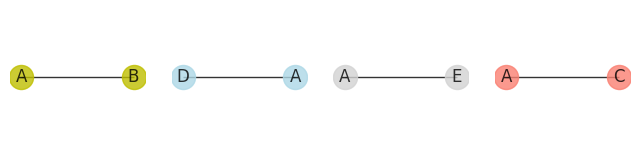

In [65]:
two_node_subgraphs = find_subgraphs_containing_vertex(G, 2, 'A')
three_node_subgraphs = find_subgraphs_containing_vertex(G, 3, 'A')
four_node_subgraphs = find_subgraphs_containing_vertex(G, 4, 'A')
labels = {node: node for node in G.nodes()}
show_graphs_in_a_set(two_node_subgraphs, labels)

Each of these subgraphs are isomorphic to the two-node graphlets, so we say that node `A` is part of four subgraphs that are isomorphic to the one two-node graphlet. In code, we can visualize this by iterating through each graphlet type and show how many of the different subgraphs of the example graph are isomorphic to the graphlet type. For the two-node graph, this is easy.

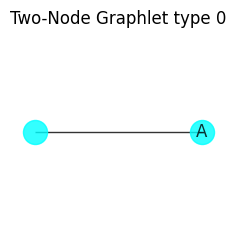

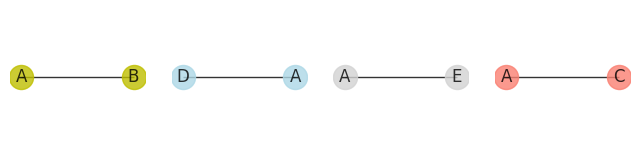

In [66]:
count: int = 0
graphlet_type_count_dict: dict[int, int] = dict()
root = 'A'
for graphlet in two_node_graphlets:
    show_graph(graphlet, 
               title = f"Two-Node Graphlet type {count}",
               labels = {root: root})
    graphs_of_graphlet_type = []
    for H in two_node_subgraphs:
        if rooted_is_isomorphic(H, graphlet, root):
            graphs_of_graphlet_type.append(H)
    graphlet_type_count_dict[count] = len(graphs_of_graphlet_type)
    count += 1
    if len(graphs_of_graphlet_type) > 0:
        show_graphs_in_a_set(graphs_of_graphlet_type, labels)

It gets more interesting when we look at three node graphlets. We'll continue by indexing each three node graphlet using the same counter.

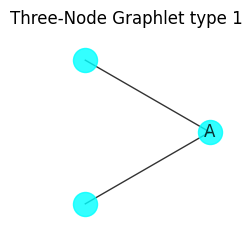

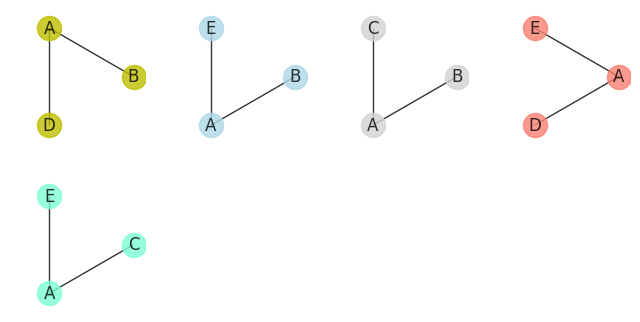

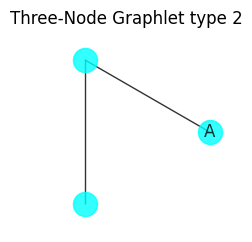

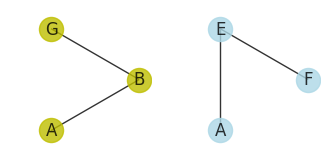

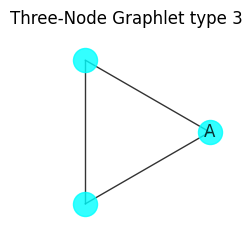

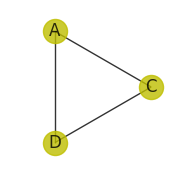

In [67]:
root = 'A'
for graphlet in three_node_graphlets:
    show_graph(graphlet, 
               title = f"Three-Node Graphlet type {count}",
               labels = {root: root})
    graphs_of_graphlet_type = []
    for H in three_node_subgraphs:
        if rooted_is_isomorphic(H, graphlet, root):
            graphs_of_graphlet_type.append(H)
    graphlet_type_count_dict[count] = len(graphs_of_graphlet_type)
    count += 1
    if len(graphs_of_graphlet_type) > 0:
        show_graphs_in_a_set(graphs_of_graphlet_type, labels)

So vertex `A` has a count of 4 type 0 graphlets, 5 type 1 graphlets, two type 2 graphlets, and one type 3 graphlet. 

Continuing with four node graphlets.

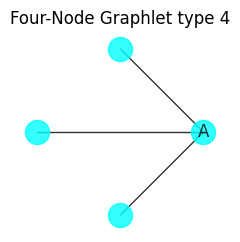

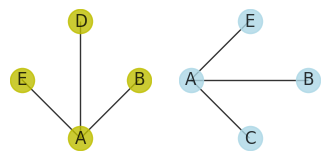

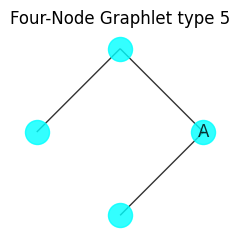

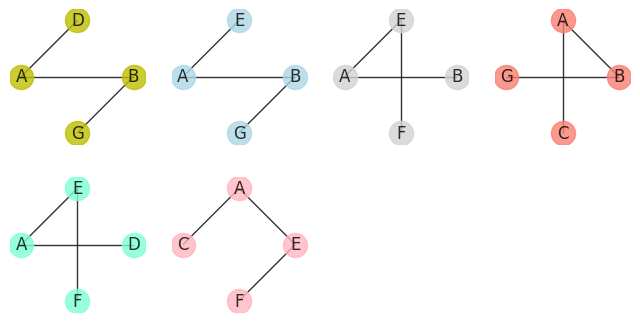

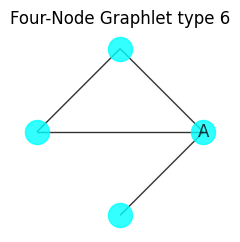

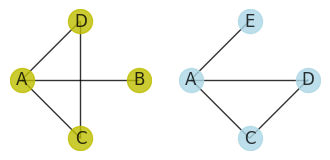

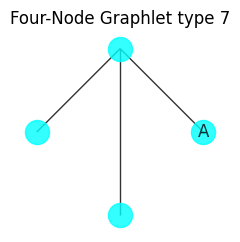

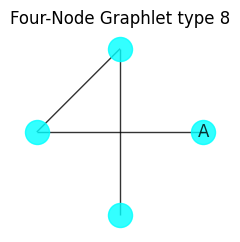

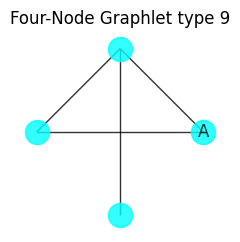

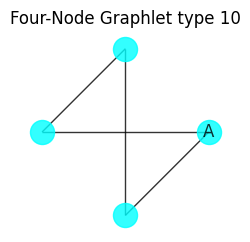

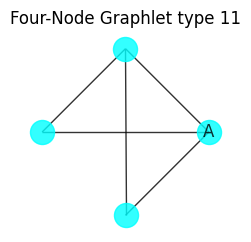

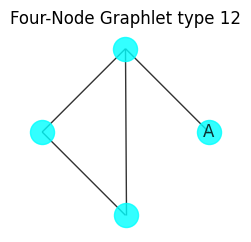

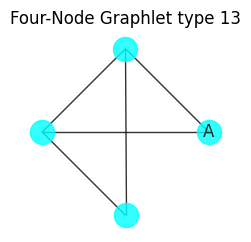

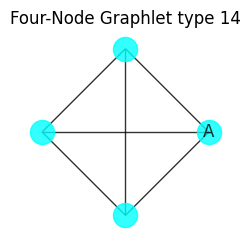

In [68]:
root = 'A'
for graphlet in four_node_graphlets:
    show_graph(graphlet, 
               title = f"Four-Node Graphlet type {count}",
               labels = {root: root})
    graphs_of_graphlet_type = []
    for H in four_node_subgraphs:
        if rooted_is_isomorphic(H, graphlet, root):
            graphs_of_graphlet_type.append(H)
    graphlet_type_count_dict[count] = len(graphs_of_graphlet_type)
    count += 1
    if len(graphs_of_graphlet_type) > 0:
        show_graphs_in_a_set(graphs_of_graphlet_type, labels)

In [69]:
print(list(graphlet_type_count_dict.values()))

[4, 5, 2, 1, 2, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0]


If we list the number of each graphlet type for vertex `A` in a list, we get the _graphlet count vector_, given by:

$v_{\rm graphlet} = [4, 5, 2, 1, 2, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0]$

This graphlet vector is a view into the local graph structures surrounding vertex `A`. 

The homework problem will have you find the graphlet vector for a couple of nodes and graphlet types for the butterfly graph.

--

#### Homework problems 1-3

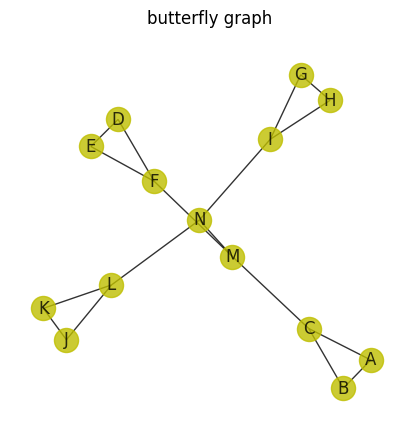

In [70]:
G = nx.Graph()
G.add_edges_from([('A','B'),('B','C'),('C','A'),
                  ('D','E'),('E','F'),('F','D'),
                  ('G','H'),('H','I'),('I','G'),
                  ('J','K'),('K','L'),('L','J'),
                  ('C','M'),('F','M'),('N','L'),('N','I'),
                  ('M','N')])
show_graph(G,
           title = "butterfly graph",
           labels = {vertex: vertex for vertex in G.nodes()},
           layout=nx.spring_layout,
           size = 4,
           node_color='y')